In [179]:
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt
from __future__ import print_function
from ipywidgets import interact, interact_manual
from IPython.display import display, FileLink, FileLinks, HTML
from clawpack.visclaw import animation_tools
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**General solution**

$$
    u(x, t) = \frac{\beta}{2} \text{sech}^2\left(\frac{\sqrt{\beta}}{2} (x - \beta t)^2\right)
$$

$$
    u(x, t) = \frac{\beta}{2} \text{csch}^2\left(\frac{\sqrt{\beta}}{2} (x - \beta t)^2\right)
$$

In [164]:
u_true = lambda x, t, beta: 0.5 * beta * np.cosh(np.sqrt(beta) * 0.5 * (x - beta * t)**2)**(-2)
tt = np.linspace(0, 4, 50)
X, T = np.meshgrid(x_range, tt)
uu = u_true(X, T, 2.)
figs = []
for i in xrange(len(tt)):
    fig = figure()
    plt.plot(x_range, uu[i, :])
    plt.ylim([-0.2, 1.2])
    figs.append(fig)
    close(fig)
images = animation_tools.make_images(figs)
animation_tools.JSAnimate_images(images)

In [166]:
u_true = lambda x, t, beta: 0.5 * beta * np.sinh(np.sqrt(beta) * 0.5 * (x - beta * t)**2)**(-2)
tt = np.linspace(0, 4, 50)
X, T = np.meshgrid(x_range, tt)
uu = u_true(X, T, 2.)
figs = []
for i in xrange(len(tt)):
    fig = figure()
    plt.plot(x_range, uu[i, :])
#     plt.ylim([-0.2, 1.2])
    figs.append(fig)
    close(fig)
images = animation_tools.make_images(figs)
animation_tools.JSAnimate_images(images)

/Users/zengfanchen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in power
  if __name__ == '__main__':


**Zabusky and Kruskal Scheme**

**explicit leapfrog finite difference scheme**

$$
    U^{1}_j = U^{0}_j -  \frac{\Delta t}{\Delta x}(U^0_{j+1} + U^0_j + U^0_{j-1})(U^0_{j+1} - U^0_{j-1}) - \frac{\Delta t}{2(\Delta x)^3} (U^0_{j+2} - 2U^0_{j+1} + 2 U^0_{j-1} - U^0_{j-2})
$$

$$
    U^{n+1}_j = U^{n-1}_j - 2 \frac{\Delta t}{\Delta x}(U^n_{j+1} + U^n_j + U^n_{j-1})(U^n_{j+1} - U^n_{j-1}) - \frac{\Delta t}{(\Delta x)^3} (U^n_{j+2} - 2U^n_{j+1} + 2 U^n_{j-1} - U^n_{j-2})
$$

$$
    \frac{\Delta t}{\Delta x} \left|-2 u_0 + \frac{1}{(\Delta x)^2} \right| \leq \frac{2}{3\sqrt{3}} ~~~ \text{where} ~~~ u_0 = \max(u)
$$



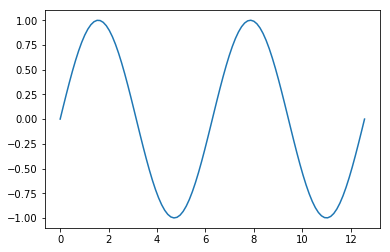

In [172]:
u_ini = lambda x: np.sin(x)
plt.plot(x_range, u_ini(x_range))

In [173]:
x_range = np.linspace(0, 4. * np.pi, 100)
dx = x_range[1] - x_range[0]
dt = 0.002 * dx
t_range = np.arange(0., 10000. * dt, dt)

In [174]:
u = np.empty((len(t_range), len(x_range)))
u[0, :] = u_ini(x_range)
u[1, 0] = (u[0, 0] - dt / dx * (u[0, 1] + u[0, 0] + u[0, -1]) * (u[0, 1] - u[0, -1]) 
          - dt / (2. * dx**3) * (u[0, 2] - 2. * u[0, 1] + 2. * u[0, -1] - u[0, -2]))
u[1, 1] = (u[0, 1] - dt / dx * (u[0, 2] + u[0, 1] + u[0, 0]) * (u[0, 2] - u[0, 0])  
          - dt / (2. * dx**3) * (u[0, 3] - 2. * u[0, 2] + 2. * u[0, 0] - u[0, -1]))
u[1, 2:-2] = (u[0, 2:-2] - (dt / dx) * (u[0, 3:-1] + u[0, 2:-2] + u[0, 1:-3]) * (u[0, 3:-1] - u[0, 1:-3]) 
             - dt / (2. * dx**3) * (u[0, 4:] - 2. * u[0, 3:-1] + 2. * u[0, 1:-3] - u[0, :-4]))
u[1, -2] = (u[0, -2] - dt / dx * (u[0, -1] + u[0, -2] + u[0, -3]) * (u[0, -1] - u[0, -3]) 
          - dt / (2. * dx**3) * (u[0, 0] - 2. * u[0, -1] + 2. * u[0, -3] - u[0, -4]))
u[1, -1] = (u[0, -1] - dt / dx * (u[0, 0] + u[0, -1] + u[0, -2]) * (u[0, 0] - u[0, -2]) 
          - dt / (2. * dx**3) * (u[0, 1] - 2. * u[0, 0] + 2. * u[0, -2] - u[0, -3]))    

In [175]:
for i in xrange(len(t_range)):
    if i == 0:
        continue
    if i == 1:
        continue
    u[i, 0] = (u[i-2, 0] - dt / dx * (u[i-1, 1] + u[i-1, 0] + u[i-1, -1]) * (u[i-1, 1] - u[i-1, -1]) 
              - dt / (2. * dx**3) * (u[i-1, 2] - 2. * u[i-1, 1] + 2. * u[i-1, -1] - u[i-1, -2]))
    u[i, 1] = (u[i-2, 1] - dt / dx * (u[i-1, 2] + u[i-1, 1] + u[i-1, 0]) * (u[i-1, 2] - u[i-1, 0])  
              - dt / (2. * dx**3) * (u[i-1, 3] - 2. * u[i-1, 2] + 2. * u[i-1, 0] - u[i-1, -1]))
    u[i, 2:-2] = (u[i-2, 2:-2] - (dt / dx) * (u[i-1, 3:-1] + u[i-1, 2:-2] + u[i-1, 1:-3]) * (u[i-1, 3:-1] - u[i-1, 1:-3]) 
                 - dt / (2. * dx**3) * (u[i-1, 4:] - 2. * u[i-1, 3:-1] + 2. * u[i-1, 1:-3] - u[i-1, :-4]))
    u[i, -2] = (u[i-2, -2] - dt / dx * (u[i-1, -1] + u[i-1, -2] + u[i-1, -3]) * (u[i-1, -1] - u[i-1, -3]) 
              - dt / (2. * dx**3) * (u[i-1, 0] - 2. * u[i-1, -1] + 2. * u[i-1, -3] - u[i-1, -4]))
    u[i, -1] = (u[i-2, -1] - dt / dx * (u[i-1, 0] + u[i-1, -1] + u[i-1, -2]) * (u[i-1, 0] - u[i-1, -2]) 
              - dt / (2. * dx**3) * (u[i-1, 1] - 2. * u[i-1, 0] + 2. * u[i-1, -2] - u[i-1, -3]))  

In [177]:
figs = []
kk = [100*i for i in xrange(99)]
for k in kk:
    fig = figure()
    plt.plot(x_range, u[k,:])
    plt.ylim([-1, 2])
    figs.append(fig)
    close(fig)

In [178]:
images = animation_tools.make_images(figs)
animation_tools.JSAnimate_images(images)

We begin with a simple example. Suppose we want to solve the linearized KdV equation
$$∂tu+∂3xu=0,  −∞<x<∞$$
$$∂tu+∂x3u=0,  −∞<x<∞$$
subject to solve initial conditions
$$u(x,0)=f(x)$$

We can solve this equation by taking the Fourier transform. and obtain
$$∂tû −ik3û =0$$
$$∂tu^−ik3u^=0$$
So that
û$$ (k,t)=f̂ (k)eik3t$$
$$u^(k,t)=f^(k)eik3t$$
Therefore
$$u(x,t)=12π∫∞−∞f̂ (k)eik3teikxdk$$

http://www.wikiwaves.org/Numerical_Solution_of_the_KdV

In [226]:
N = 1024
figs = []
tt = np.linspace(0, 2, 50)
for t in tt:
    x = np.linspace(-10,10,N)
    delta_x = x[1] - x[0]
    delta_k = 2. * np.pi / (N * delta_x)
    k = np.insert(np.arange(0, (N / 2. + 1.) * delta_k, delta_k),-1, np.arange(-(N / 2. - 1.) * delta_k, 0., delta_k),axis=0)
    f = np.exp(-x**2)
    f_hat = fft.fft(f)
    u = fft.ifft(f_hat * exp(1j * k**3 * t)).real
    fig = figure()
    plt.plot(x, u)
    plt.ylim([-0.5, 1.])
    figs.append(fig)
    close(fig)

images = animation_tools.make_images(figs)
animation_tools.JSAnimate_images(images)